In [ ]:
import numpy as np
import scipy as sp
import os

import matplotlib.pyplot as plt

from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.semi_supervised import LabelPropagation
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from scipy import stats
from sklearn.preprocessing import binarize
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve

from sklearn.decomposition import PCA

%matplotlib inline

In [ ]:
imgs = []
path = "data"
for subdir, dirs, files in os.walk(path):
    print(subdir)
    tmp = []
    for filename in files:
        if filename.endswith(".jpg"):
            img = sp.misc.imread(os.path.join(subdir, filename), flatten=True)
            tmp.append(img)
    imgs.append(tmp)
    
X = np.array(imgs[1] + imgs[2])

Y0= np.zeros((1, len(imgs[1])))
Y1 = np.ones((1, len(imgs[2])))

Y = np.hstack((Y0, Y1))

In [3]:
X.shape

(2423, 100, 100)

In [4]:
print(Y0.shape)
print(Y1.shape)
print(Y.shape)

(1, 1192)
(1, 1231)
(1, 2423)


In [15]:
def show_images(input, output, input_title="", output_title="", cmap='gray'):
    fig, (im_input, im_output) = plt.subplots(1, 2, figsize=(15, 35))
    im_input.imshow(input, cmap=cmap)
    im_input.set_title(input_title)
    im_input.set_axis_off()
    im_output.imshow(output, cmap=cmap)
    im_output.set_title(output_title)
    im_output.set_axis_off()
    fig.show()

In [16]:
def show_image(input, input_title="", cmap='gray'):
    fig, img = plt.subplots(1, 1, figsize=(3, 3))
    img.imshow(input, cmap=cmap)
    img.set_title(input_title)
    img.set_axis_off()
    fig.show()

In [17]:
def find_best_params(X, Y):
    
    clf = LogisticRegression()

    param_grid = {'C': [0.01, 0.1, 1], 'penalty':['l1', 'l2']}

    grid_search = GridSearchCV(clf, param_grid=param_grid, verbose=0)
    grid_search.fit(X, Y)
    clf = grid_search.best_estimator_
    
    scor = cross_val_score(clf, X, Y , cv=4, scoring="accuracy")
    
    return scor.mean()

In [10]:
X_train = X.reshape((X.shape[0], X.shape[1]*X.shape[2]))
Y_train = Y[0]

In [7]:
def hor_kernel(k1, k2):
    up = np.ones((k1//2, k2))
    btm = np.ones((k1//2, k2))*-1
    
    return np.vstack((up, btm))


def vert_kernel(k1, k2):
    left = np.ones((k1, k2//2))
    right = np.ones((k1, k2//2))*-1
    
    return np.hstack((left, right))


def diag_kernel(k1, k2):
    ones = np.ones((k1//2, k2//2))
    minus_ones = np.ones((k1//2, k2//2))*-1
    
    left = np.vstack((ones, minus_ones))
    right = left*-1
    
    return np.hstack((left, right))

def ver3_kernel(k1, k2):
    left = vert_kernel(k1, 2*k2//3)
    
    right = np.ones((k1, k2//3))
    
    return np.hstack((left, right))
    

In [8]:
from scipy.signal import convolve2d

def name(img, kernel):
    
    img = img.reshape((100, 100))
    
    convolved = convolve2d(img, kernel, mode="same", boundary="wrap")
    
    k1, k2 = kernel.shape
    
    res = np.zeros_like(img[:-(kernel.shape[0]), : -(kernel.shape[1])])
    
    for x in range(img.shape[0] - kernel.shape[0]):
        for y in range(img.shape[1] - kernel.shape[1]):
            res[x, y] = np.sum(img[x:x+k1, y:y+k2])
            
    return res.reshape((100 - k1)*(100 - k2))

In [9]:
X.shape

(2423, 100, 100)

In [10]:
X.reshape(X.shape[0], X.shape[1]*X.shape[2]).shape

(2423, 10000)

In [11]:
kernel = diag_kernel(10, 10)
haar_X = np.apply_along_axis(name, 1, X.reshape(X.shape[0], X.shape[1]*X.shape[2]), kernel)

C:\Program Files\Anaconda3\lib\site-packages\matplotlib\figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


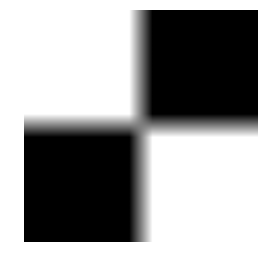

In [12]:
show_image(kernel)

In [ ]:
acc = []
Y_train = Y[0]
acc.append(find_best_params(haar_X, Y_train))
        
acc = np.array(acc)

In [ ]:
acc.mean()

In [ ]:
new_X = np.apply_along_axis(edges, 1, X_train)
new_X = new_X.reshape(X_train.shape)

In [18]:
def edge(img):
    
    phase = np.angle(np.fft.fft2(img))
    blend = 1*(np.cos(phase) + 1j*np.sin(phase))
    blend = np.real(np.fft.ifft2(blend)) 
    #blend = blend - blend.min()
    
    return blend

C:\Program Files\Anaconda3\lib\site-packages\matplotlib\figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


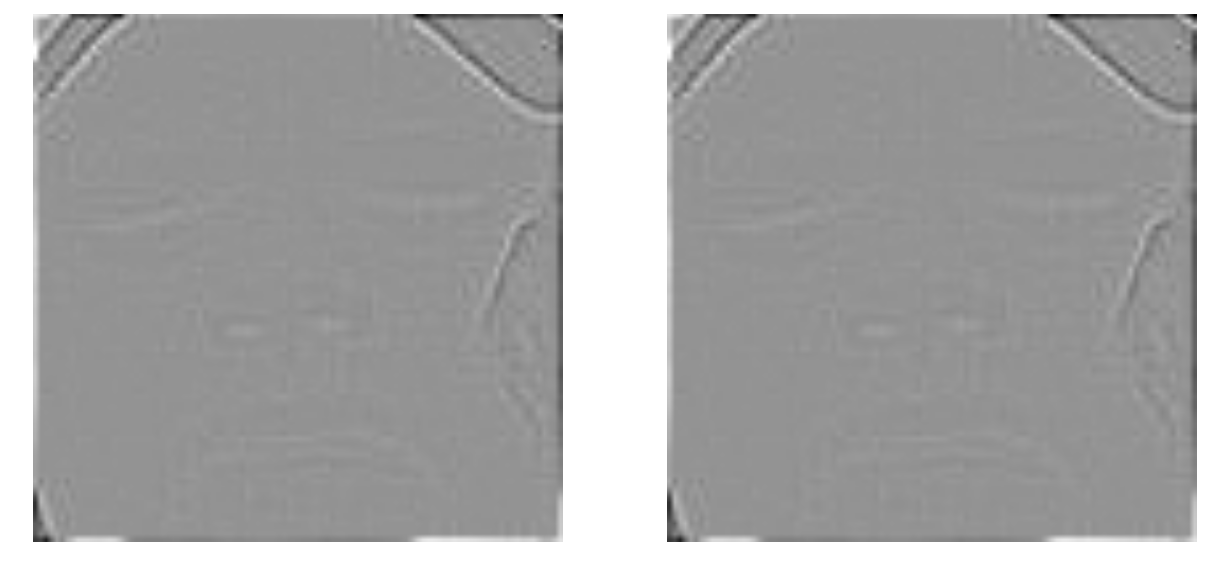

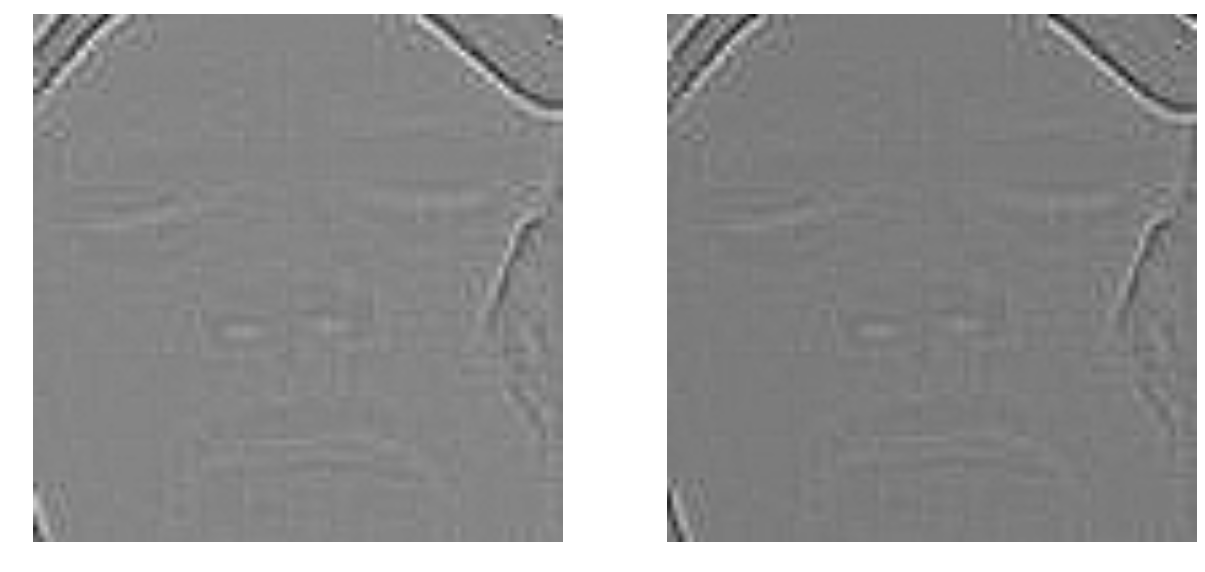

In [39]:
img = X[0]

cross = [[0, 1, 0],
          [1, -4, 1],
          [0, 1, 0]]

square = np.ones((3, 3))
square[1, 1] = -8

tmp = np.zeros((3, 3))
tmp[1, 1] = 2

res3 = convolve2d(img, square, mode="valid")

show_images(res1, res2)
show_images(res3, res4)